## xgboost 예측모델


In [36]:
import numpy as np
import pandas as pd
import xgboost as xgb

import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import skew,kurtosis
%matplotlib inline

#xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn. model_selection import cross_val_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
data = pd.read_csv('dataset2.csv')




In [37]:
data 

## dataset2에서 허리둘레, 연령대, 감마지티피, (트리글리세라이드, LDL콜레스테롤, 수축기혈압, 이완기혈압, 혈청지오티, BMI 중 2개 선택)
## ==> 허리둘레, 연령대, 감마지티피,트리글리세라이드, LDL콜레스테롤

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,26.0
1,1,7,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,0.0,25.0
2,1,9,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,28.0
3,1,11,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,0.0,26.0
4,1,11,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180115,1,13,165,65,84.0,0.9,1.2,1.0,1.0,160.0,...,15.2,1.0,1.0,34.0,12.0,78.0,1.0,1.0,0.0,24.0
1180116,1,8,180,65,77.0,1.2,1.2,1.0,1.0,123.0,...,15.9,1.0,1.0,11.0,8.0,15.0,3.0,1.0,0.0,20.0
1180117,2,14,155,55,83.0,0.2,0.6,1.0,1.0,146.0,...,12.4,1.0,0.7,21.0,15.0,23.0,1.0,0.0,0.0,23.0
1180118,2,14,155,55,84.0,0.9,1.2,1.0,1.0,130.0,...,12.9,1.0,0.8,29.0,14.0,19.0,1.0,0.0,0.0,23.0


In [38]:
data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

## Under-sampling

In [39]:
print(data['당뇨여부'].value_counts())
# print(type(data))

# 당뇨 O : 1133541
# 당뇨 X : 46579

0.0    1133541
1.0      46579
Name: 당뇨여부, dtype: int64


In [40]:
x = data.drop(['당뇨여부','식전혈당(공복혈당)'], axis=1)
print(x)

         성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  \
0           1            8        170         75  90.0    1.0    1.0    1.0   
1           1            7        180         80  89.0    0.9    1.2    1.0   
2           1            9        165         75  91.0    1.2    1.5    1.0   
3           1           11        175         80  91.0    1.5    1.2    1.0   
4           1           11        165         60  80.0    1.0    1.2    1.0   
...       ...          ...        ...        ...   ...    ...    ...    ...   
1180115     1           13        165         65  84.0    0.9    1.2    1.0   
1180116     1            8        180         65  77.0    1.2    1.2    1.0   
1180117     2           14        155         55  83.0    0.2    0.6    1.0   
1180118     2           14        155         55  84.0    0.9    1.2    1.0   
1180119     1           13        160         70  88.5    1.2    1.0    1.0   

         청력(우)  수축기혈압  ...  LDL콜레스테롤   혈색소  요단백  혈청

In [41]:
y = data['당뇨여부']
print(y)


0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64


In [42]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [43]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus08 = RandomUnderSampler(sampling_strategy=0.8)
print("Before undersampling: ", Counter(y))

x_rus08, y_rus08 = rus08.fit_resample(x, y)
print("After undersampling 0.8: ", Counter(y_rus08))


Before undersampling:  Counter({0.0: 1133541, 1.0: 46579})
After undersampling 0.8:  Counter({0.0: 58223, 1.0: 46579})


Counter({0.0: 58223, 1.0: 46579})


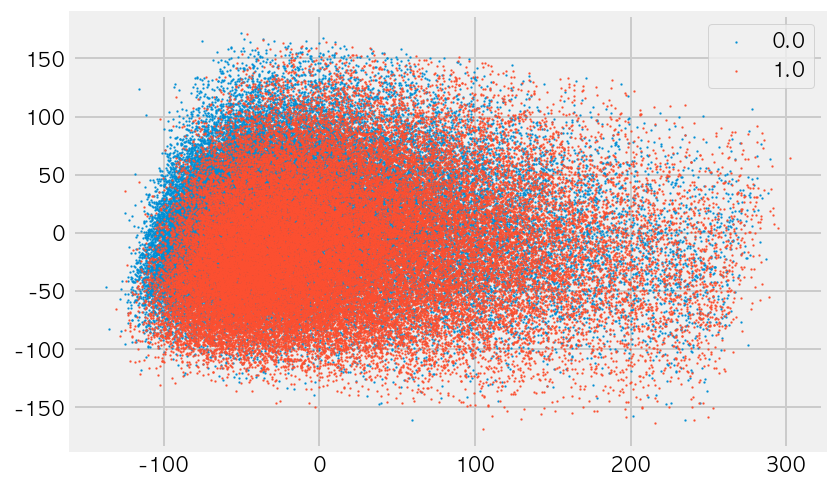

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

pca = PCA()
pca08 = pca.fit_transform(x_rus08)

counter = Counter(y_rus08)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_rus08 == label)[0]
    plt.scatter(pca08[row_ix, 0], pca08[row_ix, 1],label=str(label), linewidth = 0.1,s=1)

plt.legend()
plt.show()

## 언더샘플링 한 데이터로 xgboost 돌려보기

In [79]:
# 데이터셋 변경 방지
seed = 101

X_train08, X_test08, y_train08, y_test08 = train_test_split(x_rus08, y_rus08, test_size=0.2, random_state=seed)

model08 = xgb.XGBClassifier()

model08.fit(X_train08, y_train08)


[20:26:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
# make predictions for test data(y, 당뇨여부)
pred08 = model08.predict(X_test08)

predictions08 = [round(value) for value in pred08]


In [81]:
# evaluate predictions
accuracy08 = accuracy_score(y_test08, predictions08)

print("Accuracy08: %.2f%%" % (accuracy08 * 100.0))


Accuracy08: 71.57%


In [92]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test08, pred08))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     11741
         1.0       0.67      0.70      0.68      9220

    accuracy                           0.72     20961
   macro avg       0.71      0.71      0.71     20961
weighted avg       0.72      0.72      0.72     20961



In [82]:
roc_auc = metrics.roc_auc_score(y_test08, model08.predict_proba(X_test08)[:, 1])

print('ROC/AUC VAL: {0:.4f}'.format(roc_auc))

ROC/AUC VAL: 0.7870


In [83]:
print('xgboost model 비당뇨 사람 수 :',len(pred08[pred08 == 0])) 
print('xgboost model 당뇨 사람 수 :',len(pred08[pred08 == 1])) 
print(sep='\n')

xgboost model 비당뇨 사람 수 : 11297
xgboost model 당뇨 사람 수 : 9664



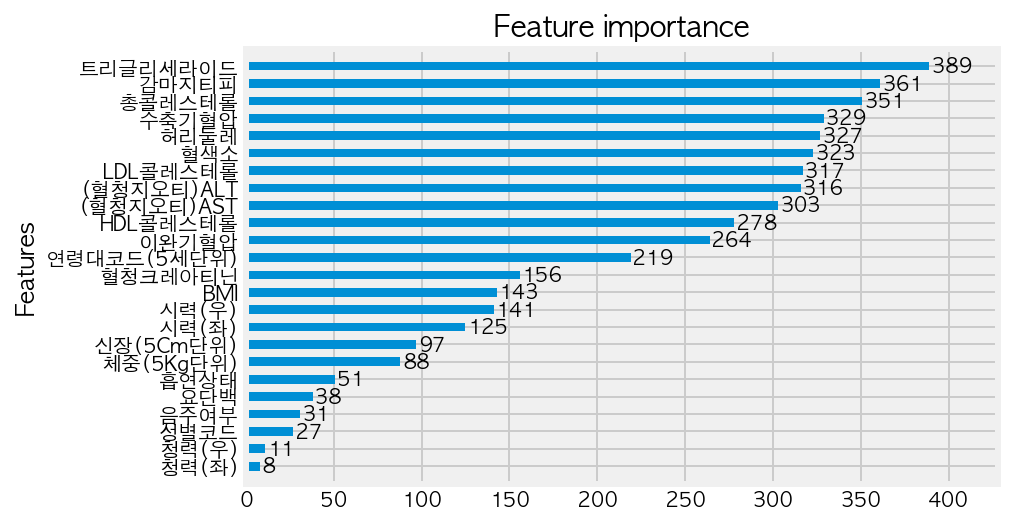

In [84]:
plot_importance(model08, height=0.5, xlabel='', ylabel='Features')
plt.show()


- plot importance 를 그냥 출력해보면  seed에 따라 중요도 순서가 살짝식 계속 바뀌게됨.
- seed 바꿔서 여러번 출력해보니 보통 트리글리세라이드가 압도적으로 1등, 그 뒤로 총콜레스테롤, LDL콜레스테롤,감마지티피, 허리둘레, (혈청지오티)ALT, 혈색소 이렇게 7개 정도가 상위권



### xgboost에서 변수 중요도를 측정하는 세 가지 기준
<br>
1. 가중치 (기본값) : 모든 트리에서 각 변수가 데이터를 분할하는 데 사용된 횟수<br>
2. 적용 범위  : 가중치와 같음 + 분할을 거치는 훈련 데이터 개수에 따라 가중치를 적용.<br>
3. 이득  : 분할에 각 변수를 사용할 때마다 감소한 평균 훈련 손실


<AxesSubplot:>

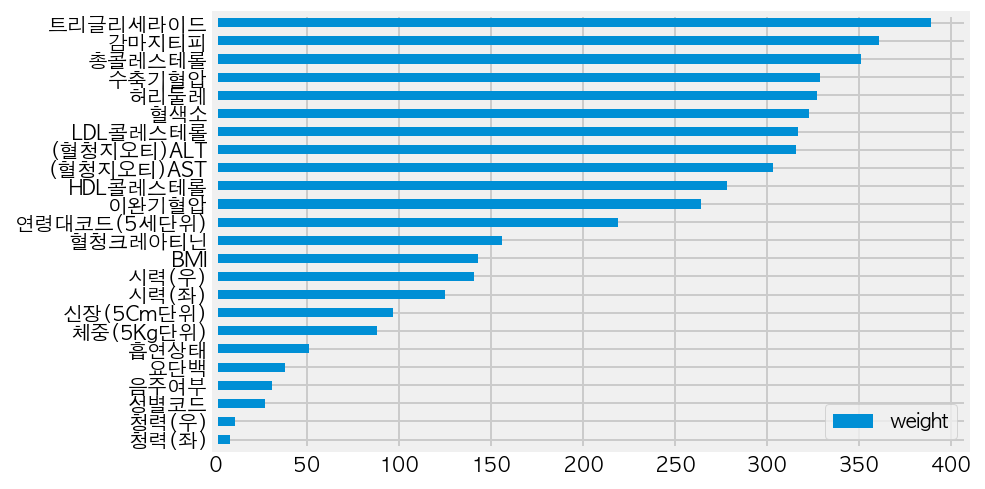

In [85]:
feature_important = model08.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["weight"]).sort_values(by = "weight")
data.plot(kind='barh')

<AxesSubplot:>

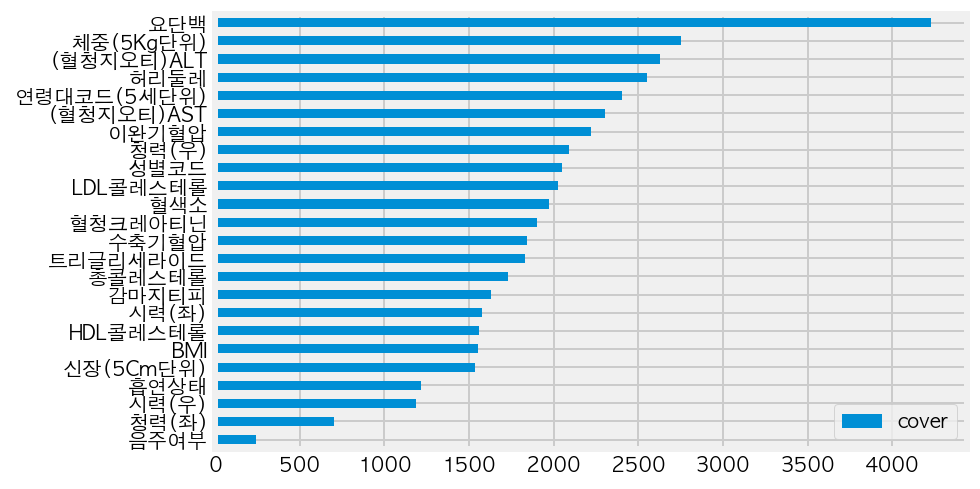

In [86]:
feature_important = model08.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["cover"]).sort_values(by = "cover")
data.plot(kind='barh')

<AxesSubplot:>

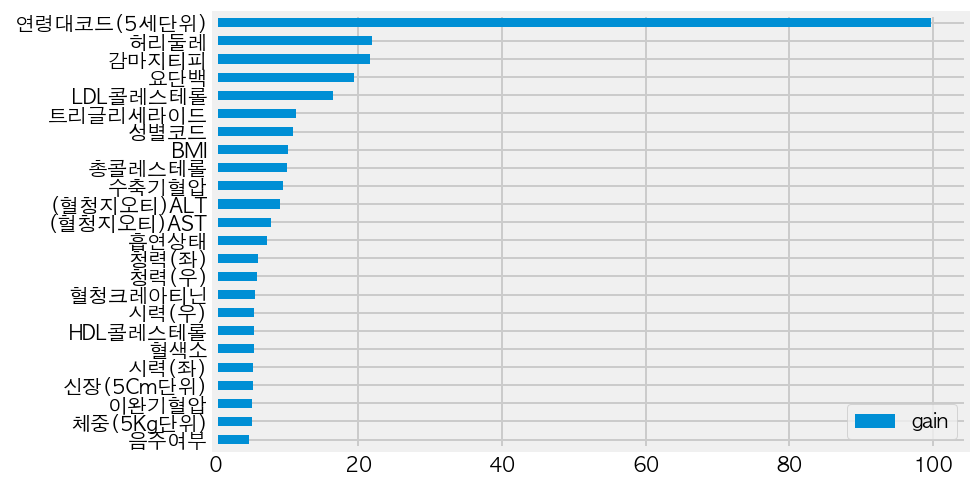

In [87]:
feature_important = model08.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain")
data.plot(kind='barh')



각 Feature Importance를 측정하는 기준에 따라 변수의 중요도가 매우 달라진다.  <br>
또한 해당 변수가 중요하다는 정도만을 알 수 있을 뿐 양의 방향으로 영향을 미치는지 음의 방향으로 영향을 미치는지 또는 얼마나 영향을 미치는지에 대해서는 알 수 없다. <br>

어떤 방식이 가장 적합한지 알아보기 위해 shap 사용하여 모델을 해석해보자

## shap

In [88]:
import shap
explainer = shap.Explainer(model08)
shap_values = explainer(X_train08)

#### 영향도 출력

In [89]:
shap.plots.force(shap_values[0])

빨간생이 영향도가 높은 것 , 파란색이 낮은 것 <br>
연령대 코드 등은 당뇨 여부에 큰 양의 영향력을 주고, 트리글리세라이드 등은 음의 영향력을 준다고 보여짐

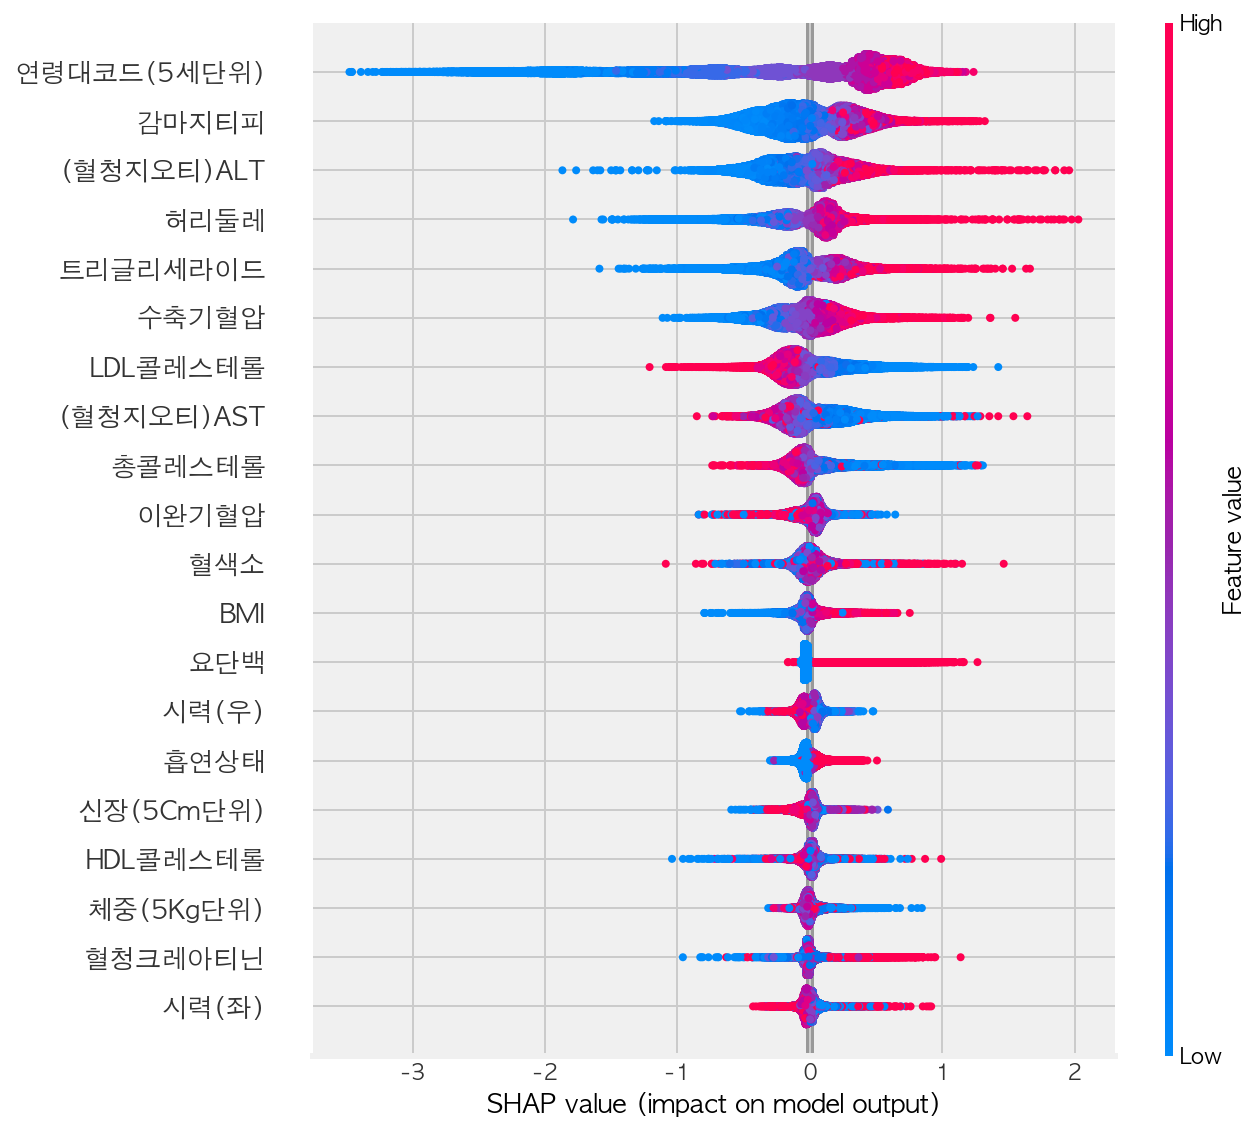

In [90]:
shap.initjs()
shap.summary_plot(shap_values,X_train08)

### shap summary plot
- 특성 중요도 + 특성 효과를 나타낸 plot (각 feature가 모델에 끼치는 영향도)
- 특성 중요도가 가장 높은 것이 맨 위에 배치된다는데 ..연령대코드 등장
- 각 점은 관측지 1개를 나타냄. 점들이 겹쳐져 있는건 밀도를 표현한 것.
- x축은 모델에서 각 사람의 feature 가 끼치는 영향을 나타냄.




그래서.. <br> 
트리글리세라이드, 총콜레스테롤, LDL콜레스테롤,감마지티피, 허리둘레, (혈청지오티)ALT, 혈색소 <br>
-> <br>
연령대코드, 감마지티피, (혈청지오티)ALT, 허리둘레, 트리글리세라이드, 수축기혈압,, 이 ,, 나왓습니다,, !
